<a href="https://colab.research.google.com/github/mrrkdas/Mini-Projects/blob/main/TFDS_with_stanford_dogs.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import tensorflow as tf
import pandas as pd
import numpy as np
import tensorflow_datasets as tfds
import matplotlib.pyplot as plt

from tensorflow.keras.layers import Input, Conv2D, MaxPool2D, Dropout, Normalization, Flatten, Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Model, load_model

## Load in dataset

In [7]:
split = ['train[:70%]', 'train[70%:]']

(train_data, test_data) = tfds.load('stanford_dogs', split = split, as_supervised = True)

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete6SK4AI/stanford_dogs-train.tfrecord


  0%|          | 0/12000 [00:00<?, ? examples/s]

0 examples [00:00, ? examples/s]

Shuffling and writing examples to /root/tensorflow_datasets/stanford_dogs/0.2.0.incomplete6SK4AI/stanford_dogs-test.tfrecord


  0%|          | 0/8580 [00:00<?, ? examples/s]

Dataset stanford_dogs downloaded and prepared to /root/tensorflow_datasets/stanford_dogs/0.2.0. Subsequent calls will reuse this data.


## Visualize Data

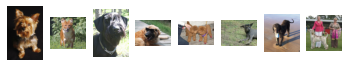

In [14]:
i = 0
fig, ax = plt.subplots(1, 8)
for image, label in train_data.take(8):
    ax[i].axis('off')
    # ax[i].set_title(classes[label])
    ax[i].imshow(image)
    i += 1
 
plt.show()

# Preprocess Images

In [15]:
def preprocess(img, label, HEIGHT=250, WIDTH = 250):
  return tf.image.resize(img, [HEIGHT, WIDTH]) / 255, label

In [16]:
train_data = train_data.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)
test_data = test_data.map(preprocess).batch(32).prefetch(tf.data.AUTOTUNE)

## Model

In [23]:
input = Input((250, 250, 3))

conv1 = Conv2D(64, (2,2), activation = 'relu')

x = conv1(input) 
x = MaxPool2D((2,2)) (x)
x = Conv2D(32, (3,3), activation = 'relu') (x)
x = MaxPool2D((2,2)) (x)
x = Conv2D(32, (3,3), activation = 'relu') (x)
x = MaxPool2D((2,2)) (x)
x = Flatten() (x)
x = Dense(64, activation = 'relu') (x)
x = Dense(32, activation = 'relu') (x)

output = Dense(120, activation = 'softmax') (x)

model = Model(input, output)

In [24]:
model.compile(loss = 'sparse_categorical_crossentropy', optimizer = 'adam', metrics = ['sparse_categorical_accuracy'])

In [ ]:
r = model.fit(train_data, epochs = 30, validation_data = test_data)

Epoch 1/30
 16/263 [>.............................] - ETA: 13:19 - loss: 4.8174 - sparse_categorical_accuracy: 0.0078